In [41]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
from cycler import cycler
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic', size=10)
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(6, 4)) 
plt.rc('axes', prop_cycle=(cycler('color', ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff', '#bdb2ff', '#FFC6FF', '#ffc6c6'])))

from scipy.stats import randint

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score

In [42]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [47]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [48]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

train_data['Age'] = num_imputer.fit_transform(train_data[['Age']])
train_data['Embarked'] = cat_imputer.fit_transform(train_data[['Embarked']])

test_data['Age'] = num_imputer.fit_transform(test_data[['Age']])
test_data['Fare'] = num_imputer.fit_transform(test_data[['Fare']])

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


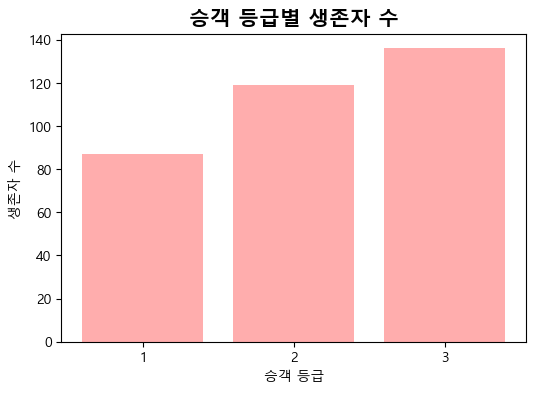

In [52]:
plt.title('승객 등급별 생존자 수', fontsize=15, fontweight='bold')
plt.bar(train_data['Pclass'].unique(), train_data.groupby('Pclass')['Survived'].sum())
plt.xticks(train_data['Pclass'].unique())
plt.xlabel('승객 등급')
plt.ylabel('생존자 수')
plt.show()

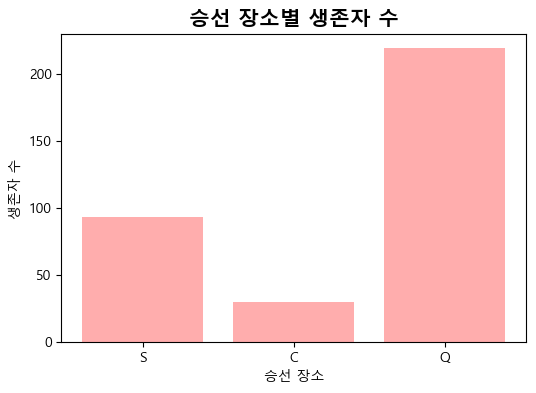

In [53]:
plt.title('승선 장소별 생존자 수', fontsize=15, fontweight='bold')
plt.bar(train_data['Embarked'].unique(), train_data.groupby('Embarked')['Survived'].sum())
plt.xticks(train_data['Embarked'].unique())
plt.xlabel('승선 장소')
plt.ylabel('생존자 수')
plt.show()

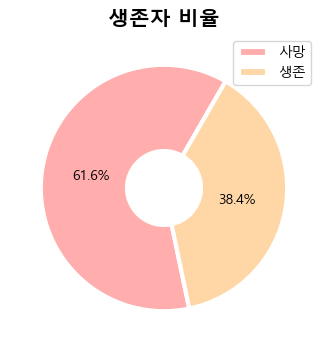

In [54]:
plt.title('생존자 비율', fontsize=15, fontweight='bold')

wedgeprops = {'width' : 0.7, 'edgecolor' : 'w', 'linewidth' : 3}

plt.pie(train_data['Survived'].value_counts(), autopct='%.1f%%', wedgeprops=wedgeprops, startangle=60, pctdistance=0.6)

plt.legend(['사망', '생존'])
plt.show()

In [55]:
male_survivor = train_data[train_data['Sex'] == 'male']['Survived']
female_survivor = train_data[train_data['Sex'] == 'female']['Survived']

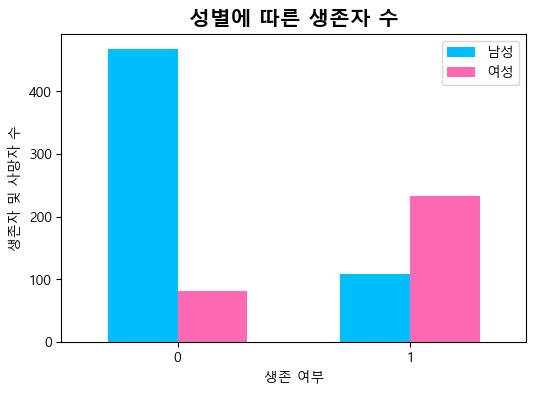

In [56]:
plt.title('성별에 따른 생존자 수', fontsize=15, fontweight='bold')
plt.bar(male_survivor.unique()-0.15, male_survivor.value_counts(), label='남성', width=0.3, color='#00BFFF')
plt.bar(female_survivor.unique()+0.15, female_survivor.value_counts(), label='여성', width=0.3, color='#FF69B4')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.xlabel('생존 여부')
plt.ylabel('생존자 및 사망자 수')
plt.legend()
plt.show()

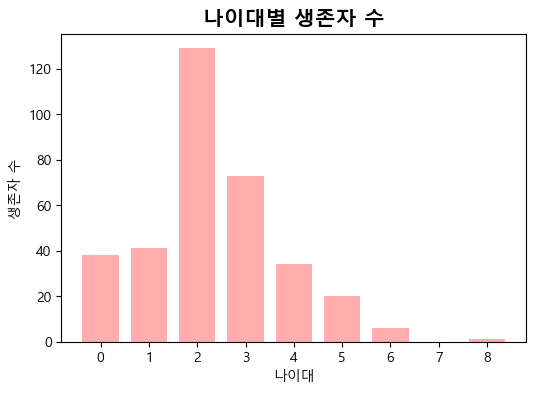

In [57]:
# 나이대 구간화 (0~10, 10~20, 20~30, 30~40, 40~50, 50~60, 60~70, 70~80, 80~)
ageband_train = train_data['Age'] // 10
ageband_test = test_data['Age'] // 10

survivor_age = train_data.groupby(ageband_train)['Survived'].sum()

plt.title('나이대별 생존자 수', fontsize=15, fontweight='bold')
plt.bar(survivor_age.index, survivor_age, width=0.75)
plt.xticks(survivor_age.index)
plt.xlabel('나이대')
plt.ylabel('생존자 수')
plt.show()

In [58]:
train_data.groupby(ageband_train)['Survived'].mean()

Age
0.0    0.612903
1.0    0.401961
2.0    0.324937
3.0    0.437126
4.0    0.382022
5.0    0.416667
6.0    0.315789
7.0    0.000000
8.0    1.000000
Name: Survived, dtype: float64

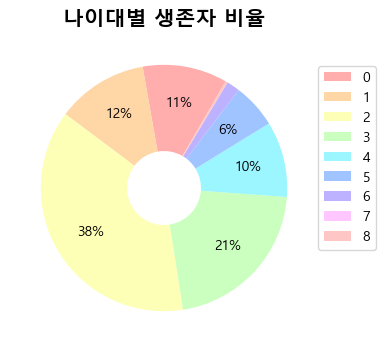

In [59]:
plt.title('나이대별 생존자 비율', fontsize=15, fontweight='bold')

wedgeprops = {'width' : 0.7}

plt.pie(survivor_age, autopct=lambda pct:f'{pct:.0f}%' if pct > 2 else '', wedgeprops=wedgeprops, startangle=60, pctdistance=0.7)
plt.legend(survivor_age.index.astype(int), loc=(1, 0.3))
plt.show()

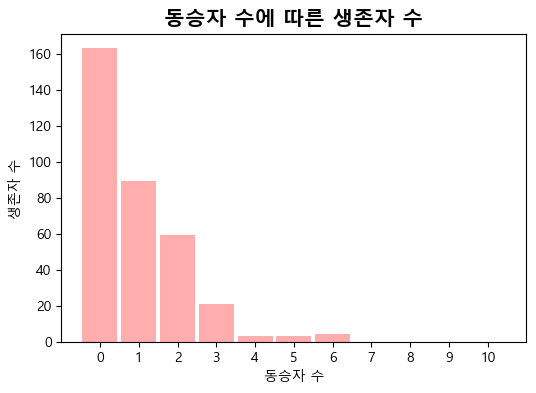

In [60]:
fellow_train = train_data['SibSp'] + train_data['Parch']
fellow_test = test_data['SibSp'] + test_data['Parch']

survivor_fellow = train_data.groupby(fellow_train)['Survived'].sum()

plt.title('동승자 수에 따른 생존자 수', fontsize=15, fontweight='bold')
plt.bar(survivor_fellow.index, survivor_fellow, width=0.9)
plt.xticks(range(11))
plt.xlabel('동승자 수')
plt.ylabel('생존자 수')
plt.show()

In [61]:
survivor_fellow

0     163
1      89
2      59
3      21
4       3
5       3
6       4
7       0
10      0
Name: Survived, dtype: int64

In [62]:
train_data['AgeBand'] = ageband_train
train_data['Fellow'] = fellow_train

test_data['AgeBand'] = ageband_test
test_data['Fellow'] = fellow_test

In [63]:
train_data[['Fellow', 'Survived']].groupby('Fellow').mean()

,Survived
Fellow,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [64]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Fellow
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,2.0,3


In [65]:
# honorific = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Mme', 'Ms', 'Capt', 'Countess', 'Don', 'Jonkheer', 'Lady', 'Sir']
    
train_data['Honorific'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data['Honorific'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [66]:
train_data['Honorific'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Honorific, dtype: int64

In [67]:
test_data['Honorific'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Honorific, dtype: int64

In [68]:
train_data['Honorific'] = train_data['Honorific'].replace(['Mlle', 'Ms'], 'Miss')
train_data['Honorific'] = train_data['Honorific'].replace('Mme', 'Mrs')
train_data['Honorific'] = train_data['Honorific'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Lady', 'Countess'], 'etc')

test_data['Honorific'] = test_data['Honorific'].replace('Ms', 'Miss')
test_data['Honorific'] = test_data['Honorific'].replace(['Col', 'Dona', 'Dr', 'Rev', 'Sir', 'Jonkheer'], 'etc')

train_data['Honorific'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
etc        23
Name: Honorific, dtype: int64

In [69]:
test_data['Honorific'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
etc         6
Name: Honorific, dtype: int64

In [70]:
train_data[['Honorific', 'Survived']].groupby('Honorific').mean()

,Survived
Honorific,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
etc,0.347826


In [71]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Fellow,Honorific
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,1,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.0,0,etc
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,0,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,2.0,3,Miss


In [72]:
train_data['Alone'] = train_data['Fellow'].apply(lambda x: 1 if x == 0 else 0)
test_data['Alone'] = test_data['Fellow'].apply(lambda x: 1 if x == 0 else 0)

In [73]:
train_data[['Alone', 'Survived']].groupby('Alone').mean()

,Survived
Alone,
0,0.505650
1,0.303538


In [74]:
corr_matrix = train_data.corr()

In [75]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
Fellow      0.016639
SibSp      -0.035322
AgeBand    -0.050972
Age        -0.064910
Alone      -0.203367
Pclass     -0.338481
Name: Survived, dtype: float64

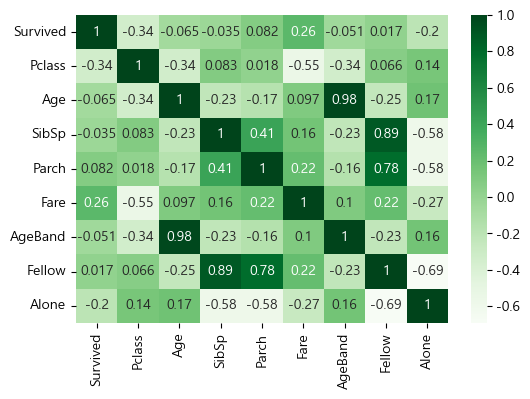

In [76]:
sns.heatmap(corr_matrix, annot=True, cmap='Greens');

In [77]:
num = ['Age', 'Fare', 'Fellow']
cat = ['Sex', 'Embarked', 'Pclass', 'Honorific', 'Alone', 'AgeBand']

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(), cat),
        ])

In [78]:
x_train = pipeline.fit_transform(train_data[num + cat])
y_train = train_data['Survived']

In [79]:
x_test = pipeline.transform(test_data[num + cat])

In [80]:
forest_clf = RandomForestClassifier(random_state=42)

param_distribs = {'n_estimators': randint(250, 300),
                  'max_features': randint(1, 15),
                  'max_depth': randint(1, 15),
                  'min_samples_split': randint(2, 15),
                  'min_samples_leaf': randint(1, 15),
                  'bootstrap': [True, False],
                  'criterion': ['gini', 'entropy', 'log_loss']
                 }

rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs, n_iter=50, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc', random_state=42)

rnd_search.fit(x_train, y_train)

print(f'Best Estimator : {rnd_search.best_estimator_}',
      f'Best Score : {rnd_search.best_score_ * 100:.4f}', sep='\n')

clf = rnd_search.best_estimator_
proba_score = cross_val_predict(clf, x_train, y_train, cv=20, method='predict_proba')
print(f'Cross Validation Score : {roc_auc_score(y_train, proba_score[:, 1]) * 100:.4f}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=14, max_features=2,
                       min_samples_leaf=2, min_samples_split=7,
                       n_estimators=284, random_state=42)
Best Score : 87.7282
Cross Validation Score : 87.8258


In [81]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=2,
                       min_samples_leaf=2, min_samples_split=7,
                       n_estimators=284, random_state=42)

In [82]:
y_pred = clf.predict(x_test)

In [83]:
submission = pd.DataFrame({
    'PassengerId': test_data.index,
    'Survived': y_pred
    })

submission.to_csv('submission.csv', index=False)